### 1. DNN을 통한 분류

#### ※ 앞으로 궁금할 상식: 분류 학습에서 왜 Cross Entropy를 사용할 때, output layer에 activation function을 안쓰는걸까?
* (Binary) Cross Entropy에 이미 activation(예: sigmoid, softmax)이 내재되어 있어, 1차로 output의 features(Not categorical)를 activation 해준 후에, 2차로 CE loss 계산

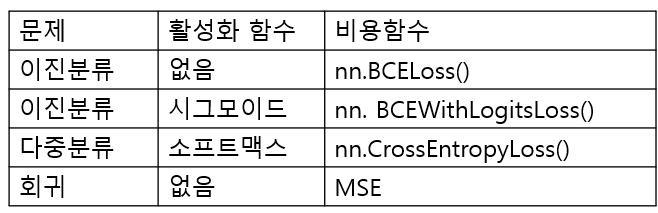

### 2. wine.csv 데이터셋 기반 DNN 이진분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred) # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.0722
Epoch 2/10, Loss: 0.1342
Epoch 3/10, Loss: 0.0167
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0045
Epoch 6/10, Loss: 0.0111
Epoch 7/10, Loss: 0.0039
Epoch 8/10, Loss: 0.0046
Epoch 9/10, Loss: 0.0054
Epoch 10/10, Loss: 0.0381
Accuracy: 0.9977


### 실습) wine.csv 데이터셋 기반 DNN 이진분류를 누군가 코드를 망쳐놨다. 고쳐보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8,   )  # 수정
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.          ()           # 수정
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.         (y_pred)   # 시그모이드를 통과해서 확률값 구함  # 수정
        y_pred =                               # 수정
        correct +=                             # 수정
        total += y_batch.size(0)

    accuracy =                        # 수정
    print(f'Accuracy: {accuracy:.4f}')


### 3. wine.csv 데이터셋 기반 DNN 이진분류

1). accracy

2). f1_score

3). confusion matrix

4). precision

5). recall

을 출력해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


Epoch 1/10, Loss: 0.0397
Epoch 2/10, Loss: 0.0018
Epoch 3/10, Loss: 0.0048
Epoch 4/10, Loss: 0.0016
Epoch 5/10, Loss: 0.3333
Epoch 6/10, Loss: 0.0050
Epoch 7/10, Loss: 0.0020
Epoch 8/10, Loss: 0.0111
Epoch 9/10, Loss: 0.0023
Epoch 10/10, Loss: 0.0038
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[980   0]
 [  3 317]]
Precision: 1.0000
Recall: 0.9906


### 4. wine.csv 데이터셋 기반 DNN 이진분류 - 클래스 불균형 해결

SMOTE를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')
df['class'].value_counts()

,count
class,
0,4898
1,1599


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   # 화이트 와인: 0, 레드 와인: 1

# 데이터셋 분리 (훈련 및 테스트 셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print(f"After SMOTE: \n{pd.Series(y_train_resampled).value_counts()}")

After SMOTE: 
0    3918
1    3918
Name: count, dtype: int64


In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 데이터를 텐서로 변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)  # 2차원으로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

Epoch 1/10, Loss: 0.0177
Epoch 2/10, Loss: 0.1369
Epoch 3/10, Loss: 0.0109
Epoch 4/10, Loss: 0.0091
Epoch 5/10, Loss: 0.2100
Epoch 6/10, Loss: 0.0045
Epoch 7/10, Loss: 0.0733
Epoch 8/10, Loss: 0.1047
Epoch 9/10, Loss: 0.1912
Epoch 10/10, Loss: 0.0055
Accuracy: 0.9962
F1 Score: 0.9922
Confusion Matrix:
[[977   3]
 [  2 318]]
Precision: 0.9907
Recall: 0.9938


### 같이해보는 실습) 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


### 5. 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자 - 클래스 불균형 해결

SMOTENC를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 데이터 로드 및 전처리
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 각 클래스가 몇개인지 보자
print(df['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [ ]:
# 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 범주형 변수 인덱스 (Pclass, Sex, Embarked)
categorical_features = [0, 1, 4]

# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 텐서변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total


### 3. iris.csv 데이터셋 기반 MLP 다중분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

'''
# 방법 1: nn.Sequential()과 add_module 사용

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

# 방법 2: nn.Sequential() 안에 직접 레이어 정의
model = nn.Sequential(
     nn.Linear(28*28*1, 100),  # input_layer = 784, hidden_layer1 = 100
     nn.ReLU(),
     nn.Linear(100, 100),  # hidden_layer2 = 100, hidden_layer3 = 100
     nn.ReLU(),
     nn.Linear(100, 10)  # hidden_layer3 = 100, output_layer = 10
     )
'''
# 방법 3: nn.Module을 상속하는 클래스 정의
class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()
        self.linear1 = nn.Linear(X_train.shape[1], 100)  # input_layer = X_train.shape[1], hidden_layer1 = 100
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(100, 100)  # hidden_layer2 = 100, hidden_layer3 = 100
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(100, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        return out5

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 5
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break

model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')


# ★ 실무 실습) 배포 받은 "신용카드 사용자 연체 예측"를 통해 자신만의 코드를 작성 해보자

[사람의 정보를 넣어서 신용을 분류예측 하는 모델을 만들어 보자!]

1. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0,1,2)=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

### 4. 깃허브 울렁증 격파하기

스토리: 누군가 나에게 분류에는 어떤 모델이 좋다고 써보라고 했다. 그 모델이 뭔진 모르겠다. 그럼에도 불구하고 갖다 써보자

### 1) TabNet 스크립트 버전

---
https://github.com/huangyz0918/tabnet

In [ ]:
!git clone https://github.com/huangyz0918/tabnet

Cloning into 'tabnet'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 11), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.74 MiB | 5.33 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd tabnet

/content/tabnet


In [ ]:
!cp -r /content/wine.csv /content/tabnet/data

In [ ]:
!pip install neptune-client==0.9.18

In [ ]:
!pip install sparsemax

In [ ]:
!python main.py  #메인에 train valid 싹다 있음. #main.py 로거 싹다 삭제

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 82, Total train loss: 0.2245, Validation criterion loss: 0.2147, Validation accuracy: 0.9108
Predictive - Epoch: 2, Step: 164, Total train loss: 0.162, Validation criterion loss: 0.2831, Validation accuracy: 0.9292
Predictive - Epoch: 3, Step: 246, Total train loss: 0.1112, Validation criterion loss: 0.2265, Validation accuracy: 0.9262
Predictive - Epoch: 4, Step: 328, Total train loss: 0.0949, Validation criterion loss: 0.2372, Validation accuracy: 0.8992
Predictive - Epoch: 5, Step: 410, Total train loss: 0.1109, Validation criterion loss: 0.328, Validation accuracy: 0.8838
Predictive - Epoch: 6, Step: 492, Total train loss: 0.1038, Validation criterion loss: 0.2709, Validation accuracy: 0.8962
Predictive - Epoch: 7, Step: 574, Total train loss: 0.1011, Validation criterion

In [ ]:
%cd ..

### 2) TabNet 울렁증 버전

---
https://github.com/dreamquark-ai/tabnet


In [ ]:
!pip install pytorch-tabnet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv('wine.csv')

# 특성과 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# TabNetClassifier 초기화 및 학습
clf = TabNetClassifier()

# GPU 모드일때
#import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#clf = TabNetClassifier(device_name=device.type)  # GPU 사용 설정

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# 예측
preds = clf.predict(X_valid)

# 성능 평가
accuracy = accuracy_score(y_valid, preds)
print(f'Accuracy: {accuracy:.4f}')


### 3) TabTransformer 오피셜이 공개되지 않은 버전

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
!pip install tab-transformer-pytorch

In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 독립 변수와 종속 변수 분리
X = df.drop('class', axis=1).values  # class 열 제외한 나머지 열 사용
y = df['class'].values  # 0 또는 1로 레이블링된 와인 품질

# 데이터셋 분리 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=[],
    num_continuous=X_train_tensor.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_train_tensor)  # 범주형 변수가 없으므로 비어있는 텐서를 줘야함.
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0 :
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_test_tensor)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.7227
Epoch 10/50, Loss: 0.6908
Epoch 15/50, Loss: 0.6619
Epoch 20/50, Loss: 0.6333
Epoch 25/50, Loss: 0.6018
Epoch 30/50, Loss: 0.5647
Epoch 35/50, Loss: 0.5207
Epoch 40/50, Loss: 0.4710
Epoch 45/50, Loss: 0.4176
Epoch 50/50, Loss: 0.3623
Valid Accuracy: 0.9738


### 3) TabTransformer 오피셜이 공개되지 않은 버전 - 타이타닉

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')

# 필요한 열 선택 및 전처리
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 범주형 변수 인코딩
label_encoders = {}
for col in ['Pclass', 'Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Survived', axis=1).values  # 'Survived' 열 제외한 나머지 열 사용
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 연속형 변수만 정규화 적용
scaler = StandardScaler()
X_train[:, [2, 3]] = scaler.fit_transform(X_train[:, [2, 3]])  # 연속형 변수 (Age, Fare)만 정규화
X_test[:, [2, 3]] = scaler.transform(X_test[:, [2, 3]])

X_train_categ = torch.tensor(X_train[:, [0, 1, 4]], dtype=torch.int64)  # 범주형 변수 (Pclass, Sex, Embarked)
X_train_cont = torch.tensor(X_train[:, [2, 3]], dtype=torch.float32)  # 연속형 변수 (Age, Fare)
X_test_categ = torch.tensor(X_test[:, [0, 1, 4]], dtype=torch.int64)
X_test_cont = torch.tensor(X_test[:, [2, 3]], dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=(3, 2, 3),  # Pclass, Sex, Embarked의 고유 값 개수
    num_continuous=X_train_cont.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(X_train_categ, X_train_cont)  # 범주형 및 연속형 변수 모두 전달
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test_categ, X_test_cont)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.4601
Epoch 10/50, Loss: 0.4423
Epoch 15/50, Loss: 0.4370
Epoch 20/50, Loss: 0.4333
Epoch 25/50, Loss: 0.4311
Epoch 30/50, Loss: 0.4291
Epoch 35/50, Loss: 0.4299
Epoch 40/50, Loss: 0.4284
Epoch 45/50, Loss: 0.4265
Epoch 50/50, Loss: 0.4268
Valid Accuracy: 0.7762


# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기


###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.